# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Wrangling**

## **Load Data**

In [2]:
df = pd.read_csv('../input/sf-salaries/Salaries.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **Overview**

In [3]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
# general information

# total 13 columns
# total 148 654 rows
# incorrect data types
# missing exist
# unnecessary columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [5]:
# statistical information

df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


## **Data Cleaning**

###  Modify data types in columns

In [6]:
# convert numeric columns to float instead of object.
df['BasePay'] = pd.to_numeric(df['BasePay'],errors='coerce')
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'],errors='coerce')
df['OtherPay'] = pd.to_numeric(df['OtherPay'],errors='coerce')
df['Benefits'] = pd.to_numeric(df['Benefits'],errors='coerce')
df['TotalPay'] = pd.to_numeric(df['TotalPay'],errors='coerce')
df['TotalPayBenefits'] = pd.to_numeric(df['TotalPayBenefits'],errors='coerce')

# not necessary
# convert Year column from integer to datetime type
# df['Year'] = pd.to_datetime(df.Year, format='%Y')

# convert text column to string
df['EmployeeName'] = df['EmployeeName'].astype('string')
df['JobTitle'] = df['JobTitle'].astype('string')
df['Agency'] = df['Agency'].astype('string')

# confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  string 
 2   JobTitle          148654 non-null  string 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  string 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(1), string(3)
memory usage: 14.7+ MB


### Missing Values

In [7]:
# missing values

df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [8]:
# ['Notes', 'Status'] columns is full of missing values and irreplaceable values, so we going to drop it.

df.drop(columns = ['Notes','Status'], inplace=True)

In [9]:
# The number of missing values in BasePay is relatively few so it would be appropriate to fill it in with an average.

base_pay_mean = df.BasePay.mean()
df['BasePay'] = df['BasePay'].fillna(base_pay_mean)

In [10]:
# fill NaN in Benefits with zero

df['Benefits'] = df['Benefits'].fillna(0.00)
df['OvertimePay'] = df['Benefits'].fillna(0.00)
df['OtherPay'] = df['Benefits'].fillna(0.00)

In [11]:
# confirm changes

df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

### Dyplicate values

In [12]:
# check duplicate values
# no duplicate

df.duplicated().sum()

0

### Detect and remove outlires

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


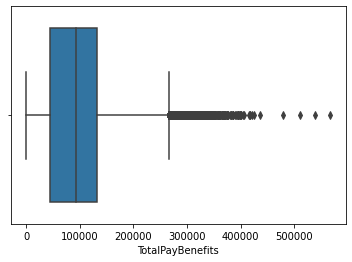

In [13]:
# detecting and remove outlires

sns.boxplot(df['TotalPayBenefits']);

In [14]:
# outliers are values greater than (Q3+1.5*IQR)
Q1 = np.percentile(df['TotalPayBenefits'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['TotalPayBenefits'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

In [15]:
# Upper bound
upper = np.where(df['TotalPayBenefits'] >= (Q3+1.5*IQR))
# lower bound
lower = np.where(df['TotalPayBenefits'] <= (Q3-1.5*IQR))


In [16]:
# Because we may need the outliers to understand a certain class of people who get very high salaries.
# it would be better to save the old data before removing the outliers (df) and store the new data in new dataframe (df_new)

df_new = df.copy()

In [17]:
# Remove outlires
df_new.drop(upper[0], inplace = True)
df_new.drop(lower[0], inplace = True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


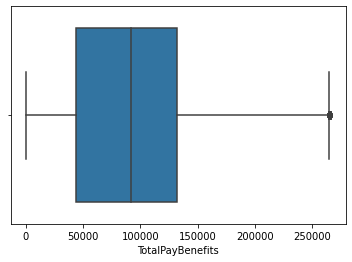

In [18]:
# confirm changes after remove outlires
sns.boxplot(df_new['TotalPayBenefits']);

### Incorrect records

In [19]:
# remove records with BasePay = 0

df[df.BasePay == 0].BasePay.count()
# there is 1298 recordf with BasePay = 0

1298

In [20]:
# drop it
df = df.drop(df[df.BasePay == 0].index)

### Data after cleaning

In [21]:
df_new.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
26,27,JOHN HANLEY,"CAPTAIN, FIRE SUPPRESSION",92080.80,0.0,0.0,0.0,265784.56,265784.56,2011,San Francisco
27,28,RAYMOND GUZMAN,"BATTALION CHIEF, (FIRE DEPARTMENT)",168692.59,0.0,0.0,0.0,265463.46,265463.46,2011,San Francisco
28,29,DENISE SCHMITT,DEPUTY CHIEF III (POLICE DEPARTMENT),261717.60,0.0,0.0,0.0,264074.60,264074.60,2011,San Francisco
29,30,MONICA FIELDS,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",246225.60,0.0,0.0,0.0,261366.14,261366.14,2011,San Francisco
30,31,HARLAN KELLY-JR,EXECUTIVE CONTRACT EMPLOYEE,234325.02,0.0,0.0,0.0,260297.66,260297.66,2011,San Francisco


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147720 entries, 26 to 148652
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                147720 non-null  int64  
 1   EmployeeName      147720 non-null  string 
 2   JobTitle          147720 non-null  string 
 3   BasePay           147720 non-null  float64
 4   OvertimePay       147720 non-null  float64
 5   OtherPay          147720 non-null  float64
 6   Benefits          147720 non-null  float64
 7   TotalPay          147720 non-null  float64
 8   TotalPayBenefits  147720 non-null  float64
 9   Year              147720 non-null  int64  
 10  Agency            147720 non-null  string 
dtypes: float64(6), int64(2), string(3)
memory usage: 13.5 MB


In [23]:
df_new.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,147720.000000,147720.000000,147720.000000,147720.000000,147720.000000,147720.000000,147720.000000,147720.000000
mean,74325.568163,65591.255215,18701.242272,18701.242272,18701.242272,73707.338009,92408.580281,2012.519415
std,42979.173674,41628.569452,16946.829350,16946.829350,16946.829350,48796.365467,60805.695950,1.118408
min,27.000000,-166.010000,-33.890000,-33.890000,-33.890000,0.000000,-33.890000,2011.000000
25%,37180.750000,33454.102500,0.000000,0.000000,0.000000,35748.445000,43507.002500,2012.000000
50%,74487.500000,64938.280000,22869.120000,22869.120000,22869.120000,71092.640000,92002.245000,2013.000000
75%,111723.250000,94127.252500,33335.552500,33335.552500,33335.552500,104937.805000,131955.922500,2014.000000
max,148653.000000,261717.600000,71603.130000,71603.130000,71603.130000,265784.560000,266073.100000,2014.000000


# Exploratory Data Analysis

### Q1: What is the BasePay average?

In [24]:
df_new.BasePay.mean()

65591.25521509517

 ### Q2: What are the three most common job?

In [25]:
df['JobTitle'].value_counts()[0:3]

Transit Operator    6975
Special Nurse       4355
Registered Nurse    3701
Name: JobTitle, dtype: Int64

### Q3: What is the average BasePay of employees as a transit operator?

In [26]:
df_new.query("JobTitle == 'Transit Operator'")['BasePay'].mean()

51898.32714173816

### Q4: What is the job of the person with the highest BasePay ever?

In [27]:
# highest BasePay
max_BasePay = df.BasePay.max()
max_BasePay

319275.01

In [28]:
df[df.BasePay == max_BasePay].JobTitle

72925    Chief of Police
Name: JobTitle, dtype: string

### Q5: Who is the person who gets the most benefits in relation to his basic salary and what is his job?

In [29]:
max_Benefits_BasePay = (df.Benefits/df.BasePay).max()
df[ (df.Benefits/df.BasePay) == max_Benefits_BasePay]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
69513,69514,Fely Alminiana,Asst General Services Manager,170.29,7380.22,7380.22,7380.22,882.51,8262.73,2012,San Francisco


### Q6: What is the highest amount of OvertimePay ?

In [30]:
df.OvertimePay.max()

96570.66

### Q7: How many jobs represented by only one person in 2014?

In [31]:
df_2014 = df.query("Year == 2014")
(df_2014.JobTitle.value_counts() == 1).sum()

171

### Q8: What is Elizabeth Gordon's job?

In [32]:
# Note: Capital and lowercase letters must be taken into account.

df[df['EmployeeName'].str.lower() == 'Elizabeth Gordon'.lower()]['JobTitle']

27454    MEDICAL EVALUATIONS ASSISTANT
Name: JobTitle, dtype: string

### Q9: What is the base salary growth rate each year?

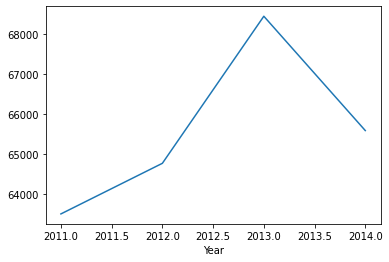

In [33]:
# grouped data to show BasePay respect year
salary_growth = df_new.groupby('Year')['BasePay'].mean()
salary_growth.plot(x='Year', y='BasePay', kind="line")
plt.show()

In [34]:
salary_growth

Year
2011    63504.192254
2012    64766.501717
2013    68434.485264
2014    65583.305586
Name: BasePay, dtype: float64

# conclusions

1. Average BasePay: 65591.25521509517.
1. Most common jobs (Transit Operator, Special Nurse, Registered Nurse).
1. Average BasePay of employees as a transit operator: 51898.32714173816.
1. Job of the person with the highest BasePay: Chief of Police.
1. Fely Alminiana work as Asst General Services Managerperson and he gets the most benefits in relation to his basic salary.
1. The highest amount of OvertimePay: 96570.66.
1. There is 171 jobs represented by only one person in 2014.
1. There was an increase in average salaries from 2011 (average 63504.192) to 2013 (average 68434.485) until it decreased in 2014 to (65583.305)